In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from msresist.figures.figure1 import make_pval_table_AXLphenotypes
from msresist.figures.common import IndividualTimeCourses, import_phenotype_data, getSetup, formatPhenotypesForModeling
from msresist.distances import PlotRipleysK
from msresist.distances import import_island_data, island_pvals_table
from msresist.pca import plotPCA

In [20]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1.4, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [4]:
lines = ["WT", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F", "Y821F"]
mutants = ['PC9', 'KO', 'KIN', 'KD', 'M4', 'M5', 'M7', 'M10', 'M11', 'M15']
tr1 = ["-UT", "-E", "-A/E"]
tr2 = ["Untreated", "Erlotinib", "Erl + AF154"]
cv = import_phenotype_data(phenotype="Cell Viability")
red = import_phenotype_data(phenotype="Cell Death")
sw = import_phenotype_data(phenotype="Migration")

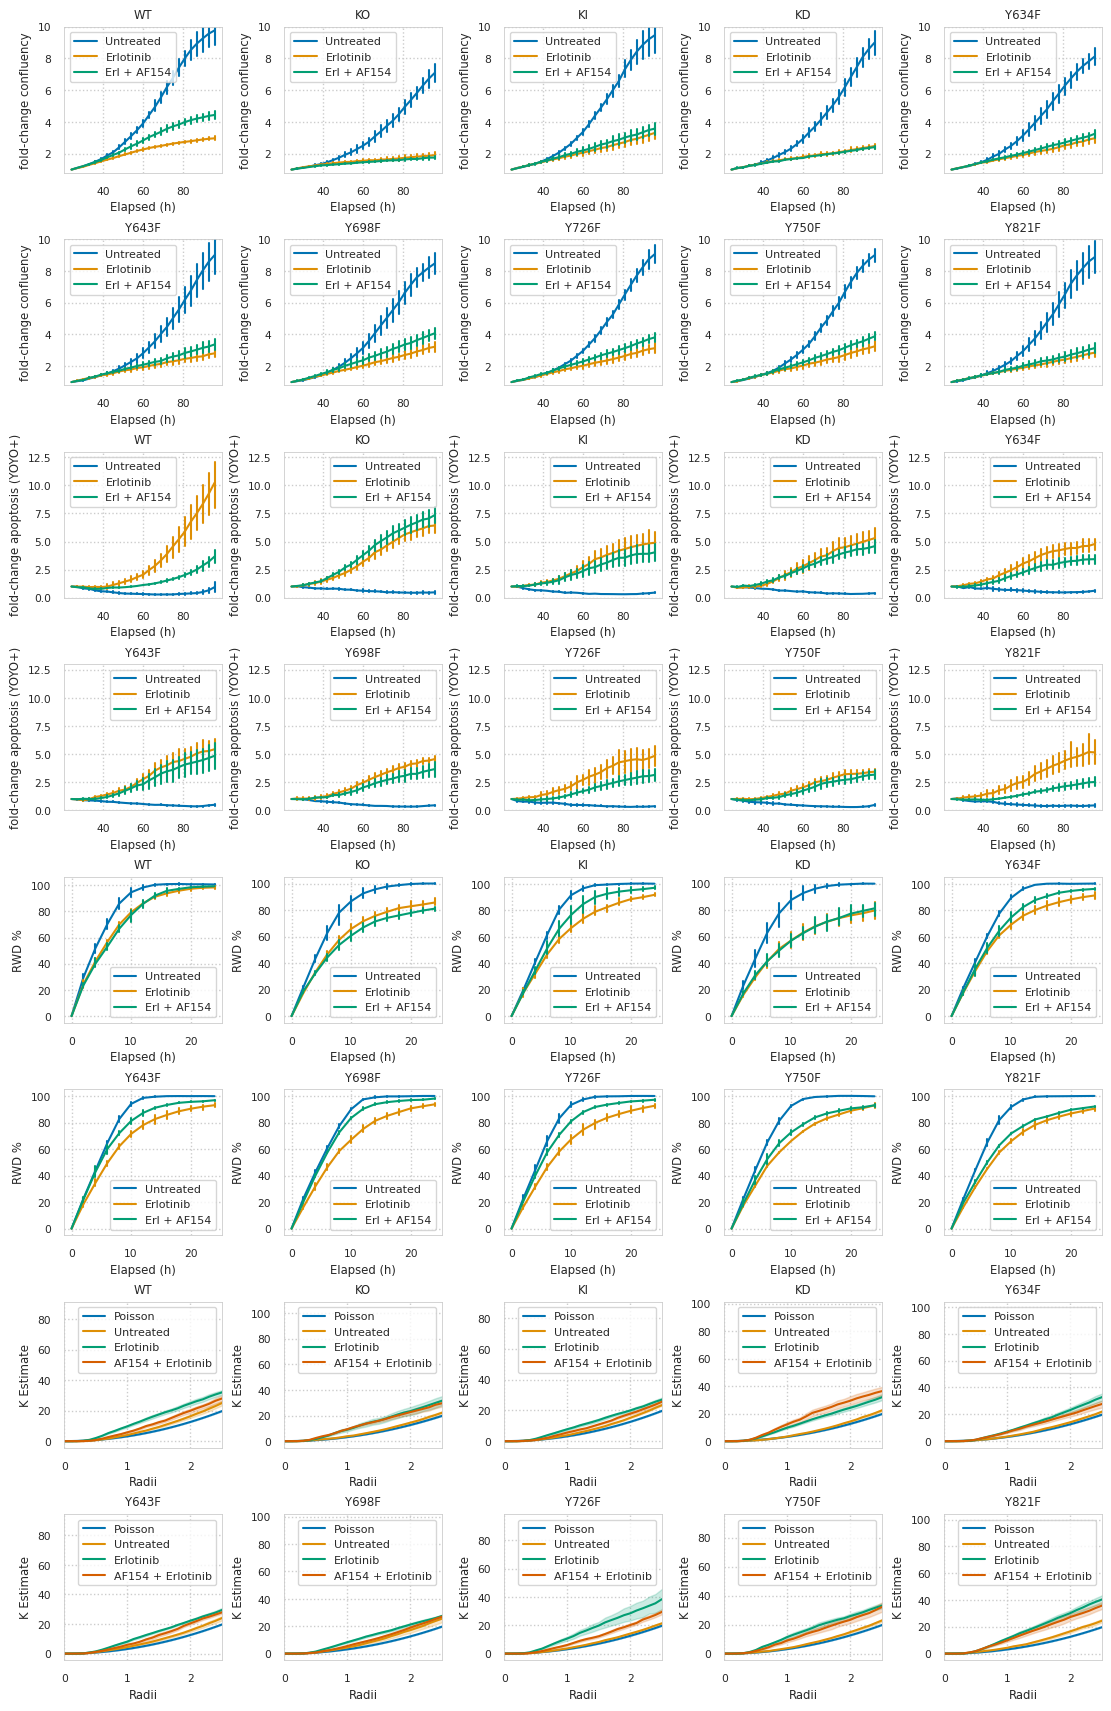

In [ ]:
ax, f = getSetup((11, 17), (8, 5))
cv_f, red_f, sw_f, ci_f = [], [], [], []
for i, line in enumerate(lines):
    cv_c = IndividualTimeCourses(cv, 96, lines, tr1, tr2, "fold-change confluency", TimePointFC=24, TreatmentFC=False, plot=line, ax_=ax[i], ylim=[0.8, 10], out=True)
    cv_c["Lines"] = line
    cv_f.append(cv_c)
    red_c = IndividualTimeCourses(red, 96, lines, tr1, tr2, "fold-change apoptosis (YOYO+)", TimePointFC=24, plot=line, ax_=ax[i + 10], ylim=[0, 13], out=True)
    red_c["Lines"] = line
    red_f.append(red_c)
    sw_c = IndividualTimeCourses(sw, 24, lines, tr1, tr2, "RWD %", plot=line, ax_=ax[i + 20], out=True)
    sw_c["Lines"] = line
    sw_f.append(sw_c)
    ci_c = PlotRipleysK(mutant=mutants[i], ax=ax[i + 30], title=line, out=True)
    ci_c["Lines"] = line
    ci_f.append(ci_c)

In [8]:
df = make_pval_table_AXLphenotypes(cv_f, red_f, sw_f, ci_f)
df

,Cell Line,Phenotype,p-value
10,KD,Apoptosis,0.930876
17,KI,Apoptosis,0.275270
18,KO,Apoptosis,0.206053
16,WT,Apoptosis,0.000006
19,Y634F,Apoptosis,0.001907
13,Y643F,Apoptosis,0.124009
14,Y698F,Apoptosis,0.026426
11,Y726F,Apoptosis,0.000164
15,Y750F,Apoptosis,0.065958
12,Y821F,Apoptosis,0.000002


In [9]:
island_data = pd.concat(
    [
        import_island_data('48hrs', mutant, ['ut', 'e', 'ae'], 6)
        for mutant in mutants
    ]
)

In [10]:
c = island_data[island_data["Radii"] == 1]
island_pvals_table(c, lines)

,Island
Cell Line,
WT,0.003637
KO,0.831466
KI,0.023012
KD,0.198585
Y634F,0.585596
Y643F,0.034163
Y698F,0.001857
Y726F,0.031960
Y750F,0.257776


/home/creixell/AXLomics/msresist/pca.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(prop={'size': 8})
/home/creixell/AXLomics/msresist/pca.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].annotate(txt, (dLoad_["PC1"][j] + 0.001, dLoad_["PC2"][j] + 0.001), fontsize=10)


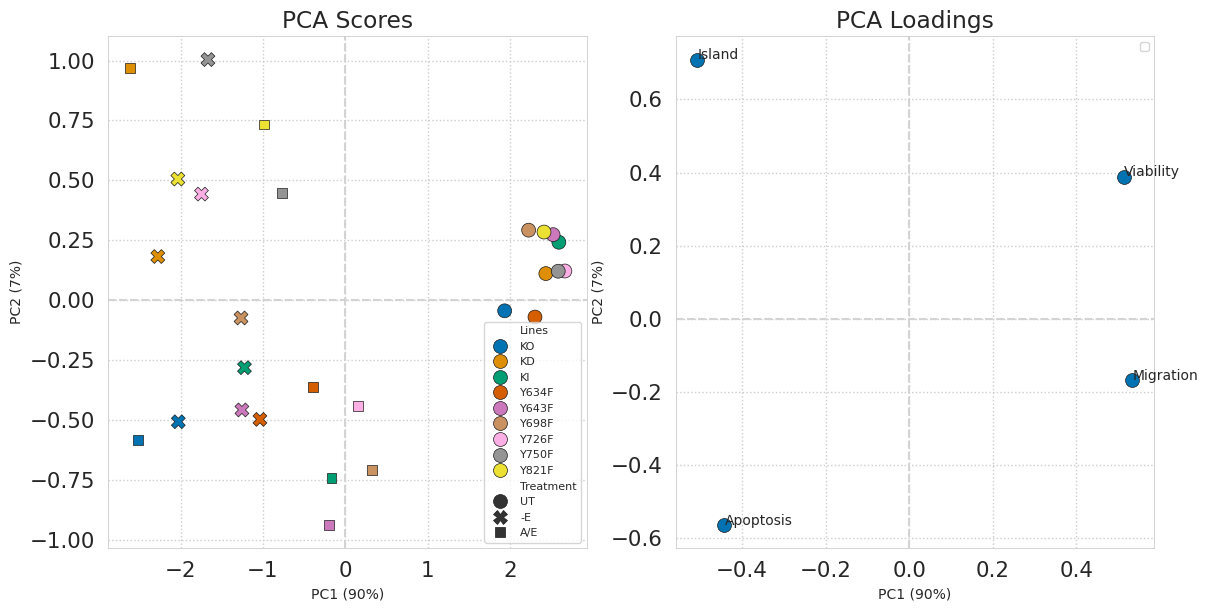

In [29]:
c = import_phenotype_data(phenotype="Island")
y = formatPhenotypesForModeling(cv, red, sw, c)
y = y[y["Lines"] != "WT"]

_, ax = plt.subplots(1, 2, figsize=(12, 6))
plotPCA(ax, y, 3, ["Lines", "Treatment"], hue_scores="Lines", style_scores="Treatment", legendOut=False)
plt.tight_layout()